<a href="https://colab.research.google.com/github/luoChengwen/keras/blob/master/Kaggle_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/c/digit-recognizer/

In [0]:
# !pip install tensorflow==2.0.0-beta0


In [0]:

# files = files.upload()

In [28]:
import tensorflow as tf
print(tf.__version__)
from google.colab import files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


2.0.0-beta0


In [0]:
# from google.colab import drive
# drive.mount('/content/drive')

path = "/content/drive/My Drive/Kaggle/mnist/train.csv"
train_data = pd.read_csv(path)

# train_data = pd.read_csv('train.csv')

In [30]:
print(train_data.columns)
train_data.head()

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [31]:
print(np.shape(train_data))

(42000, 785)


In [32]:
sum(train_data.isnull().sum()>1)


0

In [33]:
from keras.utils import to_categorical

labels = train_data.iloc[:,0]
labels = labels.as_matrix()
labels = to_categorical(labels)
x_data = train_data.iloc[:,1:]
x_data = np.array(x_data).reshape(-1,28,28,1)
train_X, validation_X, train_y, validation_y = train_test_split(x_data, labels, test_size=.1)
print(type(train_y[0]))
print(train_y[0])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


<class 'numpy.ndarray'>
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 1.0, '[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]')

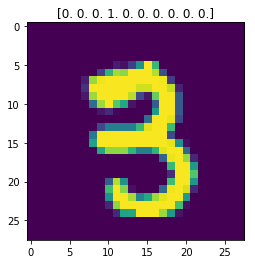

In [34]:
np.shape(train_X[0])
plt.imshow(np.squeeze(train_X[0]))
plt.title(train_y[0])

In [0]:
from xgboost import XGBClassifier
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [36]:
train_y[0]
print(type(train_y[0]))

<class 'numpy.ndarray'>


In [0]:
train_datagen = ImageDataGenerator(rescale = 1/255,
                                   width_shift_range = .2,
                                   height_shift_range = .2,
                                   shear_range = .2,
                                   rotation_range=25,
                                   fill_mode = 'nearest'
    # Your Code Here
    )


validation_datagen = ImageDataGenerator(rescale = 1/255,
                                        width_shift_range = .2,
                                        height_shift_range = .2,
                                        shear_range = .2,
                                        rotation_range=25,
                                        fill_mode= 'nearest')
train_data_flow = train_datagen.flow(train_X, train_y, batch_size=32)
validation_data_flow = validation_datagen.flow(validation_X, validation_y, batch_size=32)

In [42]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(5,5),input_shape=(28,28,1),activation='relu', padding = 'same'),
    tf.keras.layers.Conv2D(64,(5,5),input_shape=(28,28,1),activation='relu', padding = 'same'),
    tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.BatchNormalization(axis=-1),
    tf.keras.layers.Conv2D(64,(5,5), activation = 'relu', padding = 'same'),
    tf.keras.layers.Conv2D(64,(5,5), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 64)        1664      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 28, 28, 64)        102464    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 14, 14, 64)        102464    
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 10, 10, 64)        102464    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1600)             

In [44]:
history = model.fit_generator(    
    train_data_flow,
    validation_data = validation_data_flow,
    epochs=100,
    steps_per_epoch=50,
    validation_steps=50 
)


Epoch 1/100
50/50 [==============================] - 35s 695ms/step - loss: 0.0865 - accuracy: 0.9731 - val_loss: 0.0899 - val_accuracy: 0.9694
Epoch 2/100
50/50 [==============================] - 35s 701ms/step - loss: 0.0734 - accuracy: 0.9787 - val_loss: 0.0785 - val_accuracy: 0.9756
Epoch 3/100
50/50 [==============================] - 36s 710ms/step - loss: 0.0708 - accuracy: 0.9781 - val_loss: 0.0725 - val_accuracy: 0.9787
Epoch 4/100
50/50 [==============================] - 35s 708ms/step - loss: 0.0792 - accuracy: 0.9769 - val_loss: 0.0869 - val_accuracy: 0.9762
Epoch 5/100
50/50 [==============================] - 36s 711ms/step - loss: 0.0538 - accuracy: 0.9831 - val_loss: 0.1007 - val_accuracy: 0.9725
Epoch 6/100
50/50 [==============================] - 36s 710ms/step - loss: 0.0671 - accuracy: 0.9837 - val_loss: 0.0911 - val_accuracy: 0.9731
Epoch 7/100
50/50 [==============================] - 34s 690ms/step - loss: 0.0679 - accuracy: 0.9756 - val_loss: 0.0772 - val_accuracy:

0.985625 0.9875


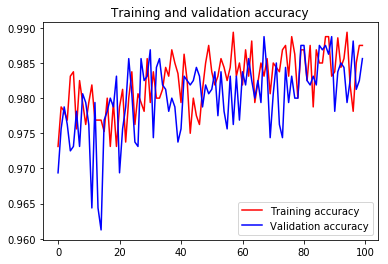

<Figure size 432x288 with 0 Axes>

In [45]:
acc = history.history['accuracy']# Your Code Here
val_acc = history.history['val_accuracy']# Your Code Here
loss = history.history['loss']# Your Code Here
val_loss = history.history['val_loss'] # Your Code Here

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
print(val_acc[-1],acc[-1])

In [0]:
y_pred_val = model.predict(validation_X/255)
from sklearn.metrics import confusion_matrix


In [47]:
y_pred_val2 = np.array([y_pred_val[i].argmax() for i in range(len(y_pred_val))])
print(y_pred_val2)
validation_y2 = np.array([validation_y[i].argmax() for i in range(len(validation_y))])
print(validation_y2)

[7 5 1 ... 1 5 6]
[7 5 1 ... 1 5 6]


In [0]:
cm = confusion_matrix(validation_y2,y_pred_val2)

In [50]:
cm

array([[421,   0,   0,   0,   0,   0,   1,   0,   0,   0],
       [  0, 458,   0,   0,   0,   0,   0,   1,   0,   0],
       [  0,   0, 399,   0,   0,   0,   0,   4,   1,   0],
       [  0,   0,   0, 408,   0,   1,   0,   1,   0,   0],
       [  0,   0,   0,   0, 420,   0,   0,   0,   0,   3],
       [  0,   0,   0,   0,   0, 359,   1,   0,   1,   0],
       [  0,   0,   0,   0,   0,   1, 435,   0,   0,   0],
       [  0,   1,   5,   1,   0,   0,   0, 431,   0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   1, 423,   2],
       [  1,   0,   0,   0,   0,   0,   0,   1,   0, 418]])

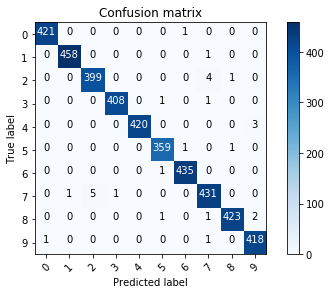

In [51]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max()/ 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# plot the confusion matrix
plot_confusion_matrix(cm, classes = range(10)) 

In [0]:
lb_test = pd.read_csv("/content/drive/My Drive/Kaggle/mnist/test.csv")

In [54]:
print(np.shape(lb_test))
print(lb_test.head())

(28000, 784)
   pixel0  pixel1  pixel2  pixel3  ...  pixel780  pixel781  pixel782  pixel783
0       0       0       0       0  ...         0         0         0         0
1       0       0       0       0  ...         0         0         0         0
2       0       0       0       0  ...         0         0         0         0
3       0       0       0       0  ...         0         0         0         0
4       0       0       0       0  ...         0         0         0         0

[5 rows x 784 columns]


In [55]:
lb_test = np.array(lb_test).reshape(-1,28,28,1)
print(np.shape(lb_test))


(28000, 28, 28, 1)


In [0]:
y_pre = model.predict(lb_test)
y_pre = [y_pre[i].argmax() for i in range(len(y_pre))]


In [0]:
y_pre = pd.Series(y_pre, name ='Label')
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),y_pre],axis = 1)

submission.to_csv("cnn_mnist_datagen.csv",index=False)



## kaggle test prediction accuracy: 0.99071

In [0]:
# model_v2 =  XGBClassifier()

# # train_X, validation_X, train_y, validation_y
# model_v2.fit(train_X, train_y)
# y_redict = model_v2.predict(train_X)
# print(y_precit[10])
# accuracy = accuracy_score(y_test, y_pred)

# results['XGBoost'] = {'training_time': t, 'accuracy': accuracy}

# # feature importance
# print(model_v2.feature_importances_)
# # plot
# pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
# pyplot.show()

# # importance
# plot_importance(model)